# JSON and APIs

_November 3, 2020_

Agenda today:
- Introduction to API and Remote Server Model 
- Getting data through an API: Case study with YELP API

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import requests
import json
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Part I. APIs and Remote Server Model
API stands for Application Programming Interface. At some point or the other, large companies would build API for their products for their clients or internal use. It allows the company's application to communicate with another application. But what _exactly_ is an API?

#### Remote server 
When we think about the world of Web, we can think of it as a collection of _servers_. And servers are nothing but huge computers that store a huge amount of data from users and are optimized to process requests. For example, when you type in www.facebook.com, your browser sends a _request_ to the Facebook server, and gets a response from the server, thus interpreting the code and displaying your homepage. 

In this case, your browser is the _client_, and Facebook’s server is an API. To put it broadly, whenever you visit a website, you are interacting with its API. However, an API isn’t the same as the remote server — rather it is the part of the server that receives __requests__ and sends __responses__.

<img src='status-code.png' width = 500>

## Part II. Getting Data Through APIs

The `get()` method send a request to YELP's API, and stored information in a variable called `request`. Next, let's see if it's successful. 

#### YELP API
Sometimes you need _authentication_ to get data from a service in additional to just sending a `GET()` request. Yelp API is a perfect example. 

You will need to go to the YELP's developer's [website](https://www.yelp.com/developers/v3/manage_app) and request for a client ID and API key, which function like a key into a house of data. 

<img src='yelp.png' width = 500>

In [2]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3/businesses/search'
response = requests.get(url)

In [3]:
# check the status code
response.status_code

400

In [4]:
# usually, services would limit you to a certain amount of API calls. This varies from service
# to service, so you have to watch out to it 

f = open(".secret/yelp_api.json")
MY_API_KEY = json.load(f)


term = 'food'
location = 'NYC'
SEARCH_LIMIT = 40

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term,#.replace(' ', '+'),
                'location': location,#.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)


food = json.loads(response.text)
df = pd.DataFrame(food['businesses'])

In [42]:
response.status_code

200

In [9]:
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price,longitude,latitude,geometry
0,6ur9R2Fmr-7qXlNnyoclEg,blume-new-york,Blume,https://s3-media2.fl.yelpcdn.com/bphoto/YFmv_B...,False,https://www.yelp.com/biz/blume-new-york?adjust...,10,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",4.5,"{'latitude': 40.777565, 'longitude': -73.9517855}",[],"{'address1': '1652 2nd Ave', 'address2': '', '...",+16469810764,(646) 981-0764,8782.679221,NaN,-73.951785,40.777565,POINT (-73.95179 40.77757)
1,c0rwFLc_xk8AG0vitOiK5g,wadadli-jerk-brooklyn,Wadadli Jerk,https://s3-media2.fl.yelpcdn.com/bphoto/Dm4nbw...,False,https://www.yelp.com/biz/wadadli-jerk-brooklyn...,2,"[{'alias': 'caribbean', 'title': 'Caribbean'},...",4.5,"{'latitude': 40.684781, 'longitude': -73.944547}",[],"{'address1': '370 Tompkins Ave', 'address2': '...",+19176871508,(917) 687-1508,4782.117671,NaN,-73.944547,40.684781,POINT (-73.94455 40.68478)
2,X8ZS-dgiMIJvhwf9SaDnjw,wah-fung-no-1-new-york-2,Wah Fung No 1,https://s3-media3.fl.yelpcdn.com/bphoto/oMrite...,False,https://www.yelp.com/biz/wah-fung-no-1-new-yor...,1469,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.5,"{'latitude': 40.71735, 'longitude': -73.99457}",[],"{'address1': '79 Chrystie St', 'address2': '',...",+12129255175,(212) 925-5175,1323.285181,$,-73.994570,40.717350,POINT (-73.99457 40.71735)
3,Ms3CAGddVbgetiQrpzqxPQ,hometown-bar-b-que-brooklyn-3,Hometown Bar-B-Que,https://s3-media3.fl.yelpcdn.com/bphoto/a5YpbH...,False,https://www.yelp.com/biz/hometown-bar-b-que-br...,1399,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...",4.0,"{'latitude': 40.6748965703426, 'longitude': -7...","[pickup, delivery]","{'address1': '454 Van Brunt St', 'address2': '...",+13472944644,(347) 294-4644,3860.435747,$$,-74.016049,40.674897,POINT (-74.01605 40.67490)
4,pqGGfA3Vm9srfTIJLgL0Ew,mamas-noodle-house-brooklyn-3,Mama's Noodle House,https://s3-media4.fl.yelpcdn.com/bphoto/HslXTc...,False,https://www.yelp.com/biz/mamas-noodle-house-br...,93,"[{'alias': 'cantonese', 'title': 'Cantonese'},...",4.5,"{'latitude': 40.6168614546041, 'longitude': -7...",[],"{'address1': '1782 Bay Ridge Ave', 'address2':...",+18489994918,(848) 999-4918,9850.578747,$,-73.993044,40.616861,POINT (-73.99304 40.61686)


In [43]:
# examine the response object
response

<Response [200]>

In [7]:
# json.load()
# json.loads()

# working with JSON
food = json.loads(response.text)

In [8]:
# cleaning and exploring the data
for key in food.keys():
    print(key)

businesses
total
region


Text(0.5, 1.0, 'Food rating in NYC')

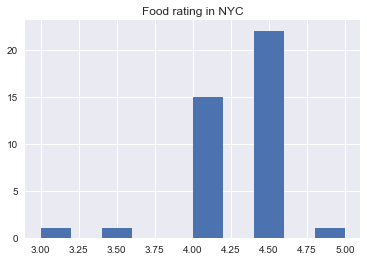

In [5]:
# let's turn the things we need into a pandas dataframe
df.rating.hist()
plt.title('Food rating in NYC')

In [34]:
df_ny = gpd.read_file(gpd.datasets.get_path('nybb'))
df_ny.to_crs(epsg=3857)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-8243264.851 4948597.836, -824..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-8219461.925 4952778.732, -821..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-8222843.672 4950893.793, -822..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-8238858.864 4965915.024, -823..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-8226155.130 4982269.949, -822..."


In [13]:
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,6ur9R2Fmr-7qXlNnyoclEg,blume-new-york,Blume,https://s3-media2.fl.yelpcdn.com/bphoto/YFmv_B...,False,https://www.yelp.com/biz/blume-new-york?adjust...,10,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",4.5,"{'latitude': 40.777565, 'longitude': -73.9517855}",[],"{'address1': '1652 2nd Ave', 'address2': '', '...",+16469810764,(646) 981-0764,8782.679221,NaN
1,c0rwFLc_xk8AG0vitOiK5g,wadadli-jerk-brooklyn,Wadadli Jerk,https://s3-media2.fl.yelpcdn.com/bphoto/Dm4nbw...,False,https://www.yelp.com/biz/wadadli-jerk-brooklyn...,2,"[{'alias': 'caribbean', 'title': 'Caribbean'},...",4.5,"{'latitude': 40.684781, 'longitude': -73.944547}",[],"{'address1': '370 Tompkins Ave', 'address2': '...",+19176871508,(917) 687-1508,4782.117671,NaN
2,Ms3CAGddVbgetiQrpzqxPQ,hometown-bar-b-que-brooklyn-3,Hometown Bar-B-Que,https://s3-media3.fl.yelpcdn.com/bphoto/a5YpbH...,False,https://www.yelp.com/biz/hometown-bar-b-que-br...,1399,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...",4.0,"{'latitude': 40.6748965703426, 'longitude': -7...","[pickup, delivery]","{'address1': '454 Van Brunt St', 'address2': '...",+13472944644,(347) 294-4644,3860.435747,$$
3,jnEv25Y2DosTq2sNnvmC9g,los-tacos-no-1-new-york,Los Tacos No.1,https://s3-media2.fl.yelpcdn.com/bphoto/FU44TY...,False,https://www.yelp.com/biz/los-tacos-no-1-new-yo...,3022,"[{'alias': 'tacos', 'title': 'Tacos'}]",4.5,"{'latitude': 40.7425547, 'longitude': -74.0060...",[],"{'address1': '75 9th Ave', 'address2': '', 'ad...",,,4244.358699,$
4,pqGGfA3Vm9srfTIJLgL0Ew,mamas-noodle-house-brooklyn-3,Mama's Noodle House,https://s3-media4.fl.yelpcdn.com/bphoto/HslXTc...,False,https://www.yelp.com/biz/mamas-noodle-house-br...,93,"[{'alias': 'cantonese', 'title': 'Cantonese'},...",4.5,"{'latitude': 40.6168614546041, 'longitude': -7...",[],"{'address1': '1782 Bay Ridge Ave', 'address2':...",+18489994918,(848) 999-4918,9850.578747,$


In [7]:
df['longitude']=df.coordinates.map(lambda x: x['longitude'])
df['latitude']=df.coordinates.map(lambda x: x['latitude'])

gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.longitude, df.latitude))
nyc = gpd.read_file("Borough Boundaries.geojson")

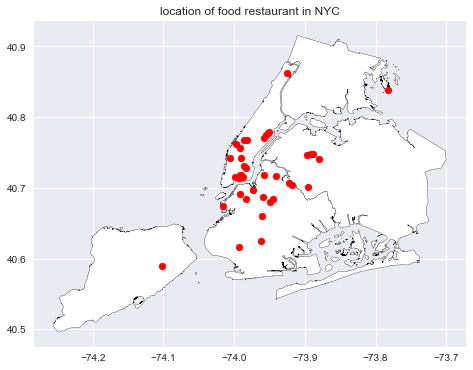

In [26]:
ax = nyc.plot(color='white', edgecolor='black',figsize=(8,6))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')
plt.title('location of food restaurant in NYC')
plt.show()

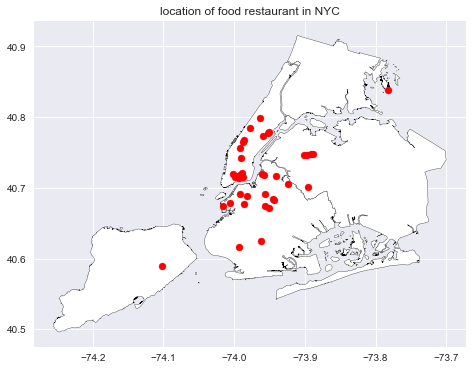

In [8]:
#new york city shapefiles, NYC Open Data

#nyc.to_crs("EPSG:3395")
#gdf.to_crs("EPSG:4326")
ax = nyc.plot(color='white', edgecolor='black',figsize=(8,6))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')
plt.title('location of food restaurant in NYC')
plt.show()

#### Resources
- [Getting Data from Reddit API](https://www.storybench.org/how-to-scrape-reddit-with-python/)
- [Twitch API](https://dev.twitch.tv/docs)